In [1]:
import tensorflow as tf
import numpy as np
import os

import cv2
import imghdr
from matplotlib import pyplot as plt

In [2]:
os.path.join('original_dataset_sepreate','Tree_Images')

'original_dataset_sepreate\\Tree_Images'

In [3]:
os.listdir('original_dataset_sepreate')

['Not_Tree_Images', 'Tree_Images']

In [4]:
data = tf.keras.utils.image_dataset_from_directory('original_dataset_sepreate')

Found 1000 files belonging to 2 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
batch = data_iterator.next()

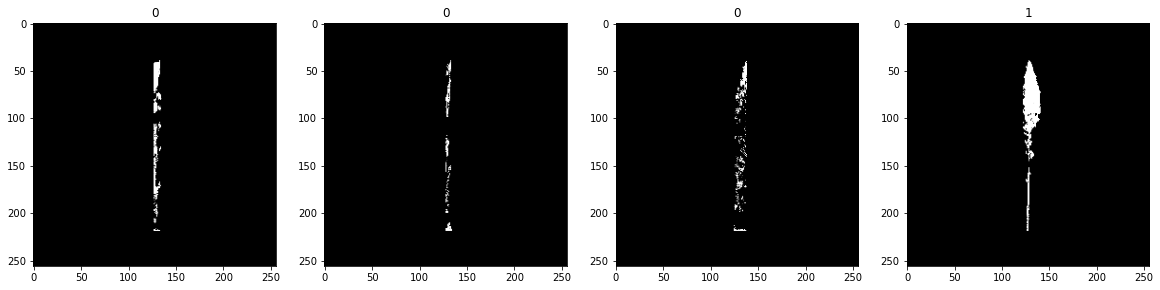

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x,y: (x/255, y))

In [9]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [10]:
train_size

22

In [11]:
val_size

6

In [12]:
test_size

3

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
22/22 [==============================] - 37s 2s/step - loss: 0.3164 - accuracy: 0.8693 - val_loss: 0.2148 - val_accuracy: 0.9375
Epoch 2/20
22/22 [==============================] - 32s 1s/step - loss: 0.0898 - accuracy: 0.9659 - val_loss: 0.0454 - val_accuracy: 0.9844
Epoch 3/20
22/22 [==============================] - 32s 1s/step - loss: 0.0519 - accuracy: 0.9815 - val_loss: 0.0259 - val_accuracy: 0.9948
Epoch 4/20
22/22 [==============================] - 31s 1s/step - loss: 0.0301 - accuracy: 0.9915 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 5/20
22/22 [==============================] - 32s 1s/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 0.0176 - val_accuracy: 0.9948
Epoch 6/20
22/22 [==============================] - 33s 1s/step - loss: 0.0227 - accuracy: 0.9915 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 7/20
22/22 [==============================] - 32s 1s/step - loss: 0.0239 - accuracy: 0.9886 - val_loss: 0.0123 - val_accuracy: 0.9948
Epoch 8/20
22/22 [==

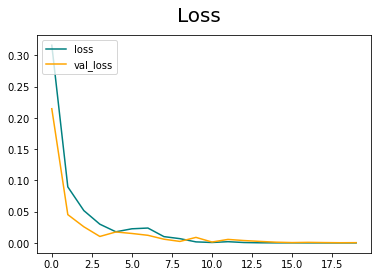

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

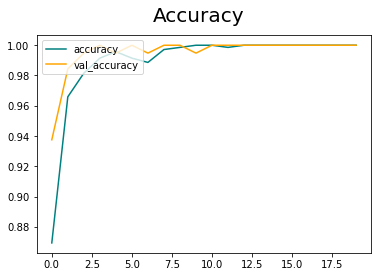

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
#success probability of making a correct positive class classification.
re = Recall()
# sensitive the model is towards identifying the positive class. It’s computed as the number of True Positives divided by the sum of True Positives and False Negatives.
acc = BinaryAccuracy()
# comfortable the model is with detecting the positive and negative classes.

# testing

In [28]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 308ms/step


In [29]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# testing single image

In [30]:
import cv2


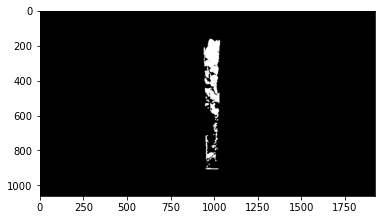

In [32]:
img = cv2.imread('no_tree_from_dataset.png')

plt.imshow(img)
plt.show()

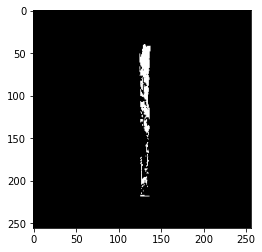

In [36]:
re_size = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [37]:
yhat = model.predict(np.expand_dims(re_size/255, 0))

1/1 [==============================] - 0s 53ms/step


In [38]:
yhat

array([[7.0787755e-05]], dtype=float32)

In [39]:
if yhat < 0.5: 
    print('Prediction: no tree')
else:
    print('Prediction: tree')

Prediction: no tree


# testing multiple images

In [40]:
from tensorflow.keras.models import load_model

In [41]:
model.save(os.path.join('models','treeclassifier.h5'))

In [42]:
new_model = load_model(r'C:\Users\91896\Documents\projects\19_sept_hackathon\models\treeclassifier.h5')

In [43]:
result = new_model.predict(np.expand_dims(re_size/255, 0))

1/1 [==============================] - 0s 178ms/step


In [44]:
result

array([[7.0787755e-05]], dtype=float32)

In [45]:
np.argmax(result)

0

In [46]:
if result < 0.5: 
    print('Prediction: no tree')
else:
    print('Prediction: tree')

Prediction: no tree


In [47]:
def model_predict(img_path,model):
    print("done")
    test_image=image.load_img(img_path,target_size=(256,256))
    test_image=image.img_to_array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    return "Tree" if result > 0.5 else "No Tree"